In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
random.seed(123)   

In [4]:
import pandas as pd

df = pd.read_csv("datasets\covid19postvaxstatewidestats.csv")

In [5]:
df

,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
0,2021-02-01,California,State,14595,24,781,1,12,0,36190068,339372,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-02,California,State,12076,21,599,0,15,0,36073331,373679,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03,California,State,11009,25,557,0,18,0,35938325,410320,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-04,California,State,9661,17,487,0,19,0,35774605,431692,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-05,California,State,8984,17,507,1,27,0,35611210,447446,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2023-03-27,California,State,607,1016,33,83,4,7,5591769,28898483,8.425650,3.002135,0.613146,0.266944,0.051096,0.027189
785,2023-03-28,California,State,502,980,28,74,3,9,5590686,28898869,8.210084,2.952661,0.564715,0.251122,0.048550,0.029166
786,2023-03-29,California,State,539,924,37,81,3,7,5589458,28899278,8.268116,2.931858,0.552060,0.250130,0.048561,0.029660
787,2023-03-30,California,State,481,961,38,65,5,9,5588295,28899658,8.157356,2.942200,0.570069,0.241723,0.061353,0.029659


In [6]:
df['area'].unique()

array(['California'], dtype=object)

In [7]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

df['date'].dtype

dtype('<M8[ns]')

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358., 19448.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04')])

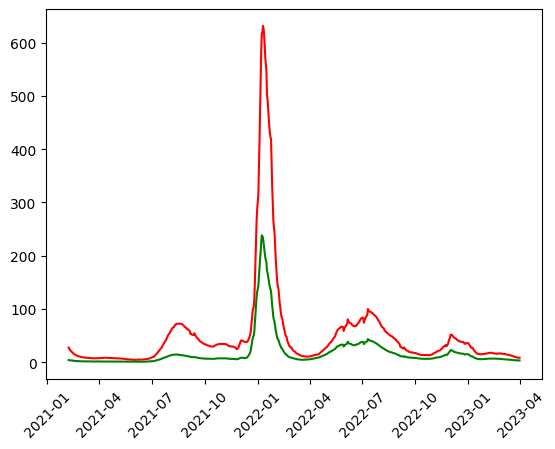

In [8]:
plt.plot(df['date'], df['unvaccinated_cases_per_100k'], color = 'r')
plt.plot(df['date'], df['vaccinated_cases_per_100k'], color = 'g')
plt.xticks(rotation = 45)

In [9]:
filtered_df = df[df['unvaccinated_cases_per_100k'].notnull()]

filtered_df

,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
6,2021-02-07,California,State,4911,8,375,0,45,0,35449430,465455,27.251295,3.805800,1.483401,0.092076,0.067702,0.000000
7,2021-02-08,California,State,8984,25,465,1,37,0,35333157,503581,25.072362,3.546032,1.360519,0.085105,0.078033,0.000000
8,2021-02-09,California,State,7387,15,429,0,38,0,35194037,544831,23.268146,3.120234,1.296892,0.078661,0.087677,0.000000
9,2021-02-10,California,State,7079,29,395,0,47,0,35042985,587459,21.766329,2.991090,1.236441,0.072953,0.099877,0.000000
10,2021-02-11,California,State,6242,30,334,1,48,0,34880775,624724,20.467271,3.109945,1.179528,0.091469,0.112219,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2023-03-27,California,State,607,1016,33,83,4,7,5591769,28898483,8.425650,3.002135,0.613146,0.266944,0.051096,0.027189
785,2023-03-28,California,State,502,980,28,74,3,9,5590686,28898869,8.210084,2.952661,0.564715,0.251122,0.048550,0.029166
786,2023-03-29,California,State,539,924,37,81,3,7,5589458,28899278,8.268116,2.931858,0.552060,0.250130,0.048561,0.029660
787,2023-03-30,California,State,481,961,38,65,5,9,5588295,28899658,8.157356,2.942200,0.570069,0.241723,0.061353,0.029659


In [10]:
data_unvaccinated = filtered_df[['unvaccinated_cases_per_100k']].values
data_vaccinated = filtered_df[['vaccinated_cases_per_100k']].values

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))

scaled_unvaccinated = scaler.fit_transform(data_unvaccinated)
scaled_vaccinated = scaler.fit_transform(data_vaccinated)

In [12]:
def sequence_data(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i+time_step,0])
    return np.array(X), np.array(y)

In [13]:
split_index = int(len(scaled_unvaccinated) * 0.8)

train_unvac = scaled_unvaccinated[:split_index]
test_unvac = scaled_unvaccinated[split_index:]

train_vac = scaled_vaccinated[:split_index]
test_vac = scaled_vaccinated[split_index:]

In [14]:
X_train, y_train = sequence_data(train_unvac, 10)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test, y_test = sequence_data(test_unvac, 10)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
X_train1, y_train1 = sequence_data(train_vac, 10)
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)

X_test1, y_test1 = sequence_data(test_vac, 10)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)

In [16]:
X_train.shape

(615, 10, 1)

In [17]:
X_train1.shape

(615, 10, 1)

In [18]:
model = Sequential()
model.add(LSTM(20, input_shape = (10,1)))
model.add(Dense(1))

from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate =  0.001), loss = 'mse', metrics = ['mae'])

history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/100


C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131 - mae: 0.0524 - val_loss: 0.0023 - val_mae: 0.0469
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - mae: 0.0446 - val_loss: 8.3559e-05 - val_mae: 0.0080
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - mae: 0.0206 - val_loss: 3.7414e-05 - val_mae: 0.0046
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - mae: 0.0193 - val_loss: 5.0971e-05 - val_mae: 0.0060
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0200 - val_loss: 4.2801e-05 - val_mae: 0.0054
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mae: 0.0187 - val_loss: 3.9351e-05 - val_mae: 0.0051
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - mae: 0.0181 - val_loss: 3.6919e-05 - val_mae: 0.0049
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - mae: 0.0174 - val_loss: 3.4034e-05 - val_mae: 0.0047
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [19]:
model_vac = Sequential()
model_vac.add(LSTM(20, input_shape = (10,1)))
model_vac.add(Dense(1))

model_vac.compile(optimizer = Adam(learning_rate =  0.001), loss = 'mse', metrics = ['mae'])

history1 = model_vac.fit(X_train1, y_train1, epochs = 100, batch_size = 32, validation_data = (X_test1, y_test1))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0350 - mae: 0.0866 - val_loss: 0.0033 - val_mae: 0.0534
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 - mae: 0.0827 - val_loss: 0.0020 - val_mae: 0.0415
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - mae: 0.0534 - val_loss: 4.0865e-04 - val_mae: 0.0185
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mae: 0.0309 - val_loss: 7.2003e-05 - val_mae: 0.0063
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - mae: 0.0222 - val_loss: 7.9883e-05 - val_mae: 0.0070
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - mae: 0.0234 - val_loss: 8.2583e-05 - val_mae: 0.0073
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - mae: 0.0227 - val_loss: 7.5456e-05 - val_mae: 0.0069
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - mae: 0.0220 - val_loss: 7.0764e-05 - val_mae: 0.0066
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


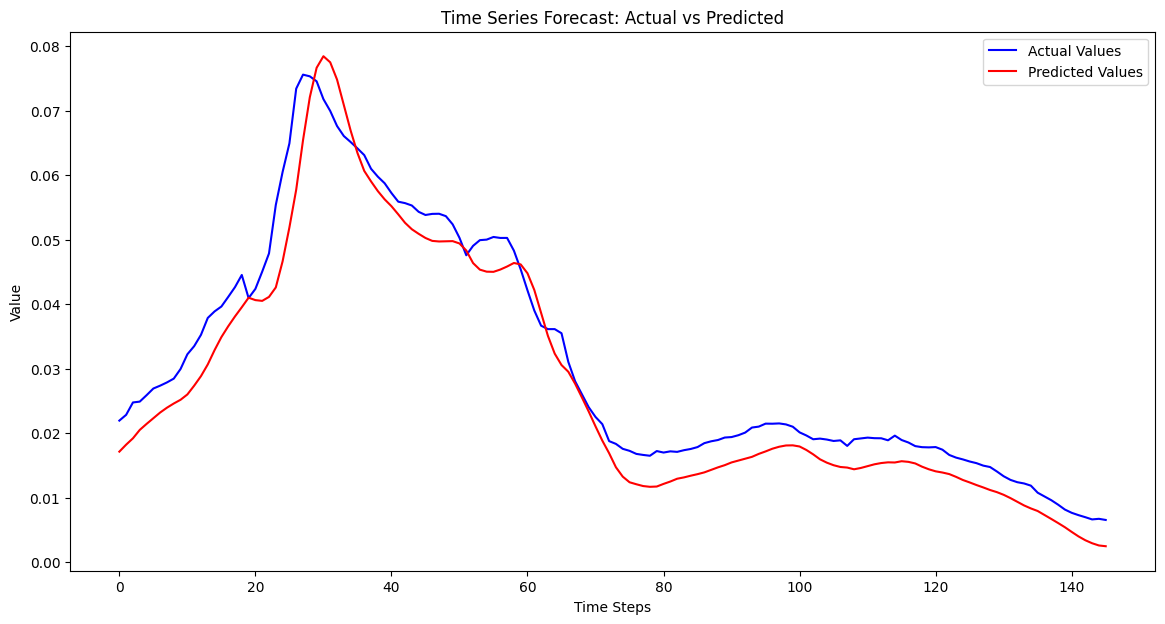

In [20]:
#Predictions for Unvaccinated
predictions = model.predict(X_test)

plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('Time Series Forecast: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


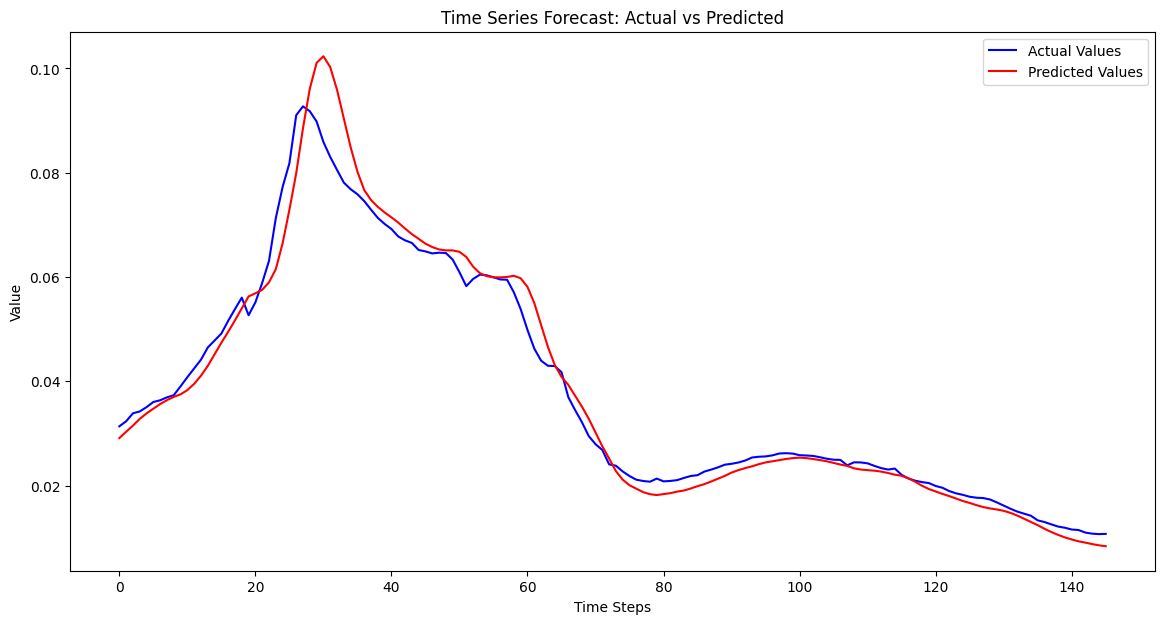

In [21]:
#Predictions for Unvaccinated
predictions = model_vac.predict(X_test1)

plt.figure(figsize=(14, 7))
plt.plot(y_test1, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('Time Series Forecast: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [22]:
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual_values = scaler.inverse_transform(y_test1.reshape(-1, 1)).flatten()


predictions

array([ 7.309676 ,  7.5985546,  7.8782215,  8.186549 ,  8.435505 ,
        8.650222 ,  8.861738 ,  9.039449 ,  9.18847  ,  9.3040905,
        9.498569 ,  9.783293 , 10.152782 , 10.601922 , 11.132075 ,
       11.657875 , 12.155713 , 12.679121 , 13.221054 , 13.767767 ,
       13.911258 , 14.0702   , 14.410128 , 15.009998 , 16.187277 ,
       17.71842  , 19.384089 , 21.44763  , 23.24087  , 24.414845 ,
       24.71814  , 24.220173 , 23.188168 , 21.874151 , 20.571035 ,
       19.457174 , 18.616547 , 18.15991  , 17.85123  , 17.59575  ,
       17.372574 , 17.134268 , 16.862314 , 16.60867  , 16.39397  ,
       16.172476 , 16.01848  , 15.9098835, 15.86713  , 15.864914 ,
       15.801579 , 15.567574 , 15.125708 , 14.827594 , 14.694487 ,
       14.637783 , 14.636886 , 14.655965 , 14.709637 , 14.593776 ,
       14.200613 , 13.4628   , 12.461524 , 11.468602 , 10.648676 ,
       10.098875 ,  9.735392 ,  9.242759 ,  8.742579 ,  8.193344 ,
        7.5638475,  6.935839 ,  6.37729  ,  5.8032484,  5.4123

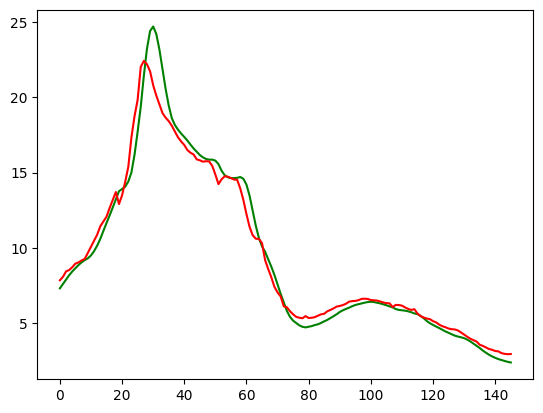

In [23]:
plt.plot(predictions, label = 'predictions', c = 'g')
plt.plot(actual_values, label = 'actuals', c = 'r')

In [24]:
forecast = 30

forecast_unvac = filtered_df[["unvaccinated_cases_per_100k"]].values
forecast_vac = filtered_df[["vaccinated_cases_per_100k"]].values

forecast_unvac = forecast_unvac[-10:]
forecast_vac = forecast_vac[-10:]

forecast_unvac = scaler.fit_transform(forecast_unvac)
forecast_vac = scaler.fit_transform(forecast_vac)

forecast_unvac = forecast_unvac.reshape((1,10,1))
forecast_vac = forecast_vac.reshape((1,10,1))

In [25]:
predictions_vac = []
predictions_unvac = []

for i in range(forecast):
    next_unvac = model.predict(forecast_unvac)
    next_vac = model_vac.predict(forecast_vac)

    next_unvac = next_unvac.reshape((1,1,1))
    next_vac = next_vac.reshape((1,1,1))

    forecast_vac = np.append(forecast_vac[:, 1:, :], next_vac, axis = 1)
    forecast_unvac = np.append(forecast_unvac[:, 1:, :], next_unvac, axis = 1)

    predictions_unvac.append(next_unvac[0,0,0])
    predictions_vac.append(next_vac[0,0,0])

predictions_vac = scaler.inverse_transform(np.array(predictions_vac).reshape(-1,1))
predictions_unvac = scaler.inverse_transform(np.array(predictions_unvac).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [26]:
last_date = filtered_df['date'].iloc[-1]

last_date

next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')

next_month

C:\Users\dangn\AppData\Local\Temp\ipykernel_18592\254149664.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')


DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')

(array([19448., 19452., 19456., 19460., 19464., 19468., 19472., 19476.,
        19478.]),
 [Text(19448.0, 0, '2023-04-01'),
  Text(19452.0, 0, '2023-04-05'),
  Text(19456.0, 0, '2023-04-09'),
  Text(19460.0, 0, '2023-04-13'),
  Text(19464.0, 0, '2023-04-17'),
  Text(19468.0, 0, '2023-04-21'),
  Text(19472.0, 0, '2023-04-25'),
  Text(19476.0, 0, '2023-04-29'),
  Text(19478.0, 0, '2023-05-01')])

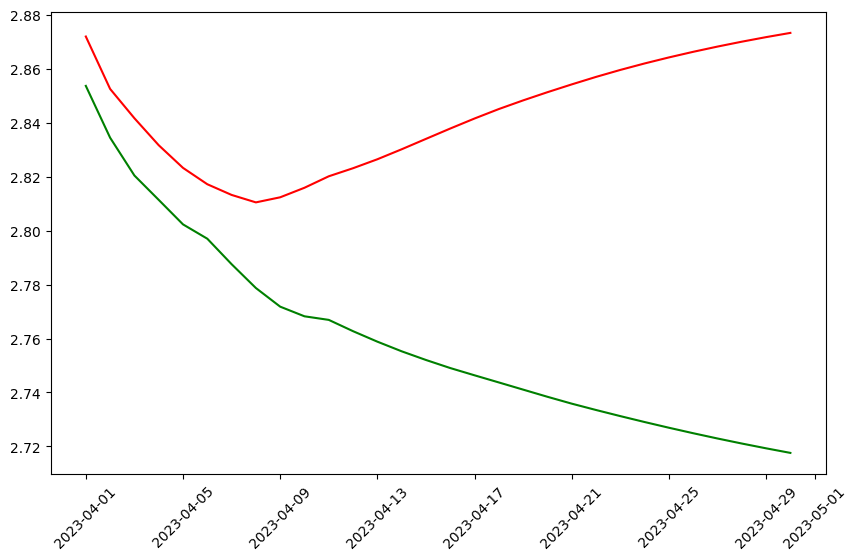

In [27]:
plt.figure(figsize=(10,6))
plt.plot(next_month, predictions_vac, color = 'g')
plt.plot(next_month, predictions_unvac, color = "r")
plt.xticks(rotation = 45)

In [28]:
# model.save('models/univariate_unvac.keras')
# model_vac.save('models/univariate_vac.keras')